In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

ModuleNotFoundError: No module named 'seaborn'

Data Collection & Analysis

In [3]:
1 # loading the dataset from csv file to a Pandas Dataflow
big_mart_data = pd.read_csv('/content/Train-Set.csv')

In [4]:
1 # first 5 rows of the dataframe
big_mart_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
1 # number of data points & number of features
big_mart_data.shape

(8523, 12)

In [6]:
1 # getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
Categorical Features: .Item_Identifier .Item_Fat_Content .Item_Type .Outlet_Identifier .Outlet_Size .Outlet_Location_Type .Outlet_Type

In [7]:
1 # checking for missing values
big_mart_data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64


Handling Missing Values Mean --> average value Mode --> Most repeated value

In [8]:
1 # mean value of "Weight" column
big_mart_data['Weight'].mean()

12.857645184135976

In [10]:
1 # filling the missing values "Weight"column with "Mean" value
2 big_mart_data['Weight'].fillna(big_mart_data['Weight'].mean(), inplace = True)

SyntaxError: ignored

In [11]:
1 # checking for missing values
big_mart_data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [12]:
1 # filling the missing values "Weight"column with "Mean" value
big_mart_data['Weight'].fillna(big_mart_data['Weight'].mean(), inplace=True)

In [13]:
1 # checking for missing values
big_mart_data.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Replacing the missing values in "Outlet_Size" with mode

In [14]:
mode_of_outletsize = big_mart_data.pivot_table(values='OutletSize', columns='OutletType', aggfunc=(lambda x: x.mode()[0]))


In [15]:
print(mode_of_outletsize)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [16]:
missing_values = big_mart_data['OutletSize'].isnull()


In [17]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool


In [18]:
big_mart_data.loc[missing_values, 'OutletSize'] = big_mart_data.loc[missing_values, 'OutletType'].apply(lambda x: mode_of_outletsize[x])


In [19]:
1 # checking for missing values
big_mart_data.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

Data Analysis

In [20]:
1 # statistical measures about the data
big_mart_data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [21]:
1 sns.set


SyntaxError: ignored

<ipython-input-22-a0c7d8e92f0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Weight'])


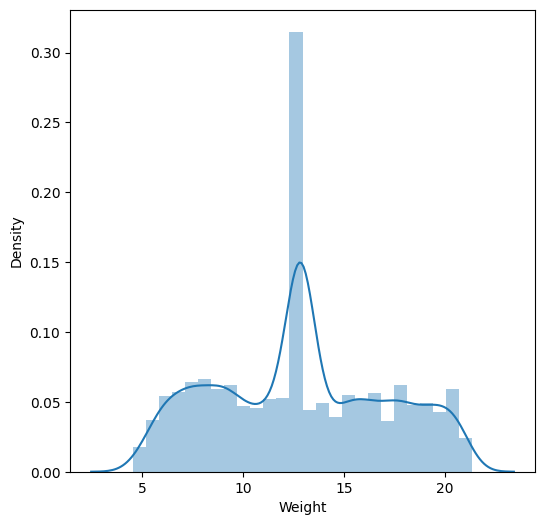

In [22]:
1 # Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Weight'])
plt.show()

<ipython-input-23-91b79d78c725>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['ProductVisibility'])


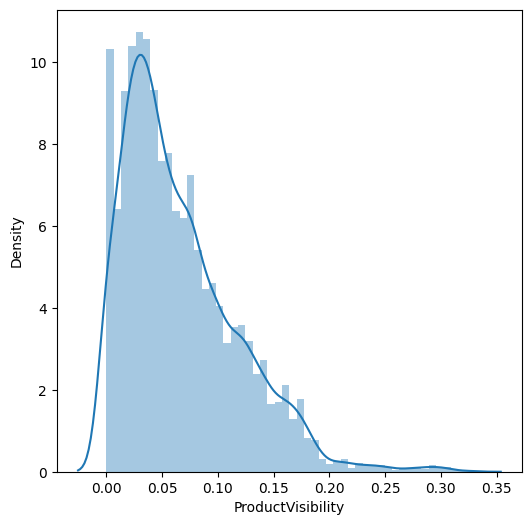

In [23]:
1 # ProductVisibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['ProductVisibility'])
plt.show()

<ipython-input-24-99a78d6e1771>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['MRP'])


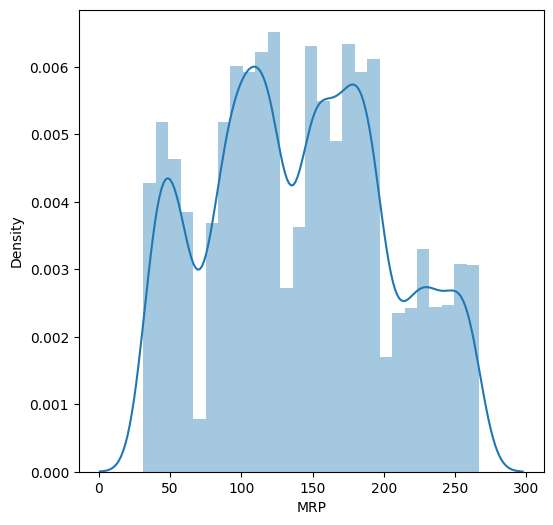

In [24]:
1 # MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['MRP'])
plt.show()

<ipython-input-25-c974b1df4924>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['OutletSales'])


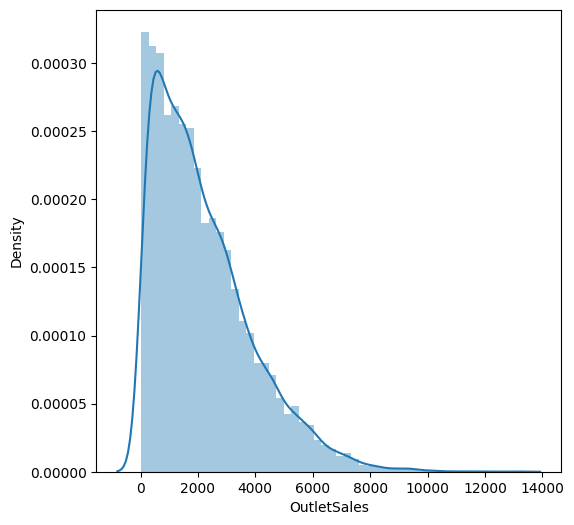

In [25]:
1  # OutletSales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['OutletSales'])
plt.show()

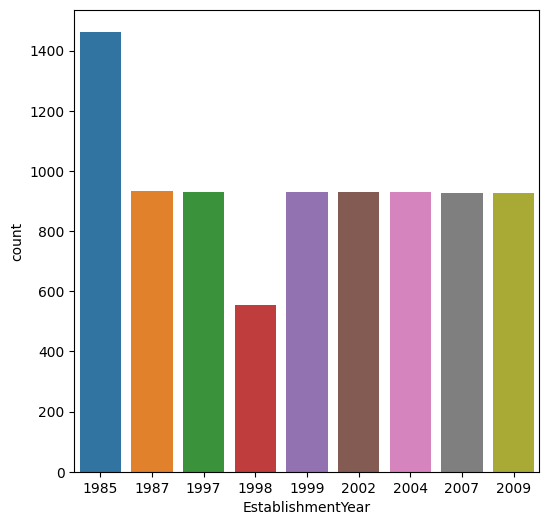

In [26]:
1  # EstablishmentYear distribution
plt.figure(figsize=(6,6))
sns.countplot(x='EstablishmentYear', data=big_mart_data)
plt.show()

In [ ]:
Categorical features

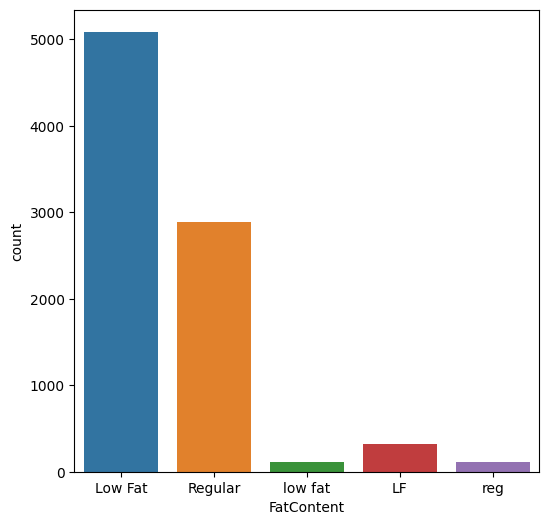

In [27]:
1  # FatContentdistribution
plt.figure(figsize=(6,6))
sns.countplot(x='FatContent', data=big_mart_data)
plt.show()

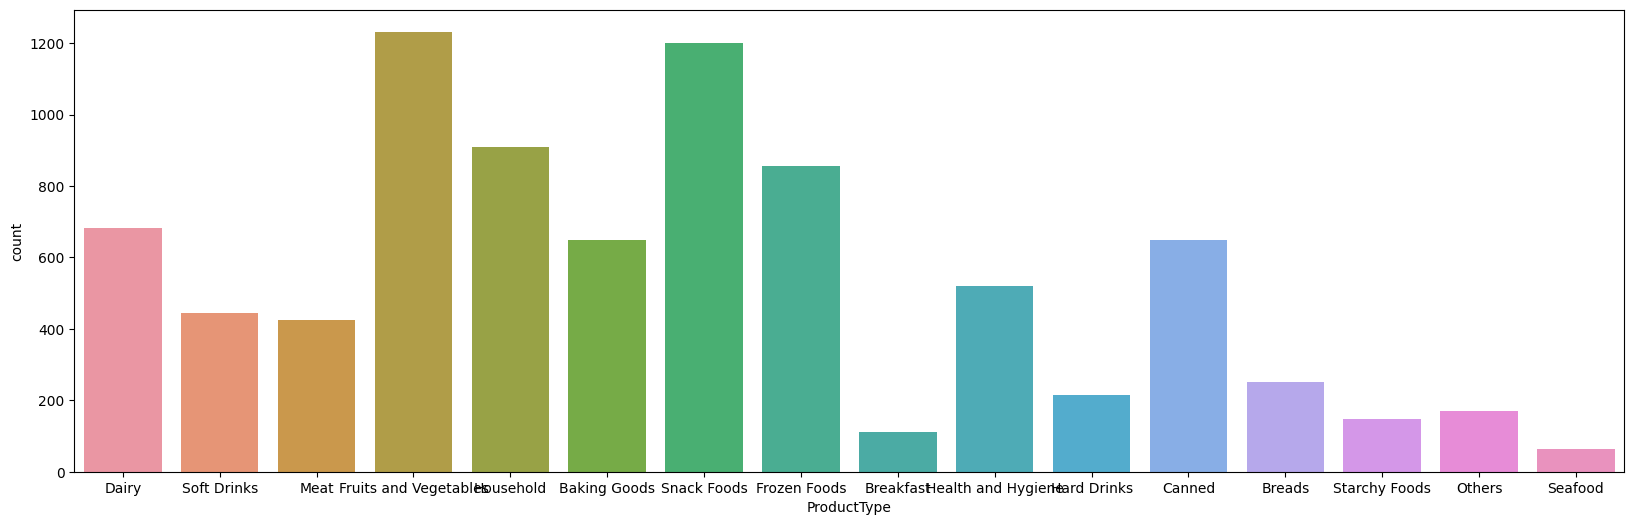

In [28]:
1  # ProductType distribution
plt.figure(figsize=(20,6))
sns.countplot(x='ProductType', data=big_mart_data)
plt.show()

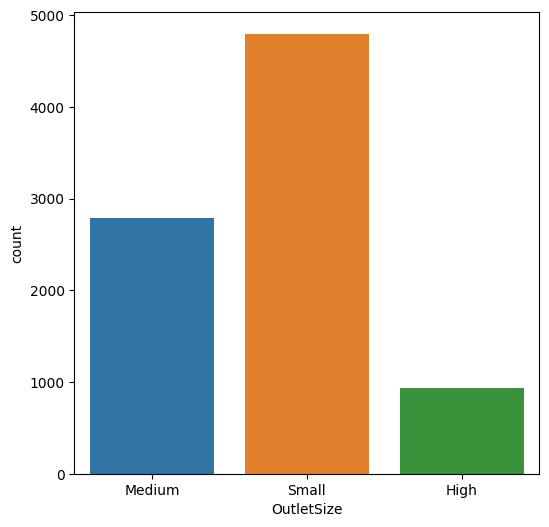

In [29]:
1  # OutletSize distribution
plt.figure(figsize=(6,6))
sns.countplot(x='OutletSize', data=big_mart_data)
plt.show()

Data Pre-Processing

In [30]:
big_mart_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
big_mart_data['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [32]:
big_mart_data.replace({'FatContent': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)


In [33]:
big_mart_data['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

Labled Encoding

In [34]:
encoder = LabelEncoder()

In [35]:
big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])
big_mart_data['FatContent'] = encoder.fit_transform(big_mart_data['FatContent'])
big_mart_data['ProductType'] = encoder.fit_transform(big_mart_data['ProductType'])
big_mart_data['OutletID'] = encoder.fit_transform(big_mart_data['OutletID'])
big_mart_data['OutletSize'] = encoder.fit_transform(big_mart_data['OutletSize'])
big_mart_data['LocationType'] = encoder.fit_transform(big_mart_data['LocationType'])
big_mart_data['OutletType'] = encoder.fit_transform(big_mart_data['OutletType'])







In [36]:
big_mart_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [43]:
X = big_mart_data.drop(columns='OutletSales')
Y = big_mart_data['OutletSales']


In [46]:
print (X)

      ProductID  Weight  FatContent  ProductVisibility  ProductType       MRP  \
0           156   9.300           0           0.016047            4  249.8092   
1             8   5.920           1           0.019278           14   48.2692   
2           662  17.500           0           0.016760           10  141.6180   
3          1121  19.200           1           0.000000            6  182.0950   
4          1297   8.930           0           0.000000            9   53.8614   
...         ...     ...         ...                ...          ...       ...   
8518        370   6.865           0           0.056783           13  214.5218   
8519        897   8.380           1           0.046982            0  108.1570   
8520       1357  10.600           0           0.035186            8   85.1224   
8521        681   7.210           1           0.145221           13  103.1332   
8522         50  14.800           0           0.044878           14   75.4670   

      OutletID  Establishme

In [47]:
print (Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64


splitting the  training data and testing data

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [55]:
print(X.shape, X_train.shape, X_test.shape)


(8523, 11) (6818, 11) (1705, 11)


Machine Learning  Model Training

XG Boost Regressor

In [58]:
regressor = XGBRegressor()


In [61]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [63]:
1 # prediction on training data
training_data_prediction = regressor.predict(X_train)


In [81]:
1 # sqared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [80]:
print('R Squared value = ', r2_train)

R Squared value =  0.5017253991620692


In [82]:
1 # prediction on test data
test_data_prediction = regressor.predict(X_test)

In [85]:
1 # R sqared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [86]:
print ('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692
